ASSIGNMENT 4
--
Kiana Greek, 40135171
COMP 333 - Data Anayltics
Task: Use python and it's libraries to perform EDA & story telling on titanic data on child survival rate
Input: Data for Titanic passengers & survival

In [11]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#import data
temp_data = pd.read_csv("titanic/train.csv")
temp_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#amount of passengers on board and number of survivors of whole dataset
print(temp_data.count())
print(temp_data.Survived.value_counts())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
0    549
1    342
Name: Survived, dtype: int64


Situation - The titanic had 2240 passengers/crew members on board when it sank. We have the information of 891 passengers.

For assignment, we are working on the subset of data that contains children. I will use the ages 0-17 as the child category.
Extract data for children into another dataframe that I will use for the rest of the assignment.

In [13]:
data = temp_data.loc[(temp_data['Age'] >= 0) & (temp_data['Age'] <= 17)]

#check number of duplicate entries
print("Number of duplicate entries: ", data.duplicated().sum())

#show first 5 entries
data.head()

Number of duplicate entries:  0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


Survived: 0 means no and 1 means yes
Pclass: 3 classes of fares - 1 is upper class, 2 is middle class, 3 lower class
SibSp: number of siblings and/or spouses on board
Parch: number of parents and/or children on board (should be 0,1,2 since we're working with data on children)
Ticket: ticket number
Fare: ticket amount
Cabin: cabin number
Embarked: port of embarkation - C is Cherbourg, Q is Queenstown, S is Southampton

Will analyze survival rate by sex, age, siblings on board, parents on board, class, port of embarkation, and cabin

In [14]:
#Add a new feature, size of family
fam_members = data[['SibSp', 'Parch']]
total = fam_members.sum(axis = 1)
data.insert(8, 'Total Family',total)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Total Family,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,4,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,1,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,2,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,5,382652,29.1250,NaN,Q


information on numeric data

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Total Family,Fare
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,429.212389,0.539823,2.584071,9.041327,1.460177,1.053097,2.513274,31.220798
std,281.743819,0.500632,0.677781,6.030408,1.625881,0.800008,2.109143,32.538092
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,7.054200
25%,172.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,12.287500
50%,420.000000,1.000000,3.000000,9.000000,1.000000,1.000000,2.000000,23.000000
75%,721.000000,1.000000,3.000000,16.000000,3.000000,2.000000,4.000000,34.375000
max,876.000000,1.000000,3.000000,17.000000,5.000000,3.000000,7.000000,211.337500


finding the total amount of data and the survival rate with no variables taken into consideration

Number of children on board:  113
61 (54%) children survived
52 (46%) children did not survive


([<matplotlib.axis.XTick at 0x12899d9b3d0>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Did Not Survive')])

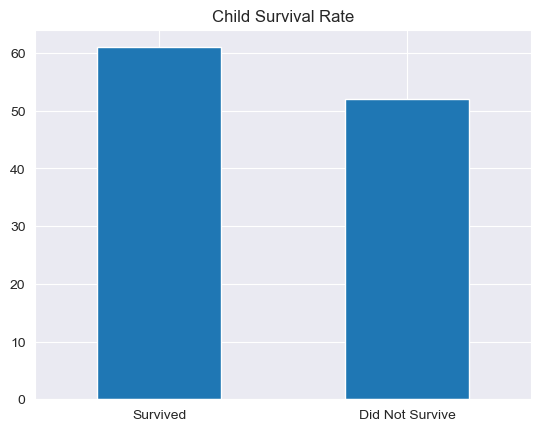

In [16]:
#amount of survivors in dataset
total_children = len(data)
print("Number of children on board: ",total_children)

#Number of children that survived
num_survived = len(data[data.Survived == 1])
print(num_survived,'({:.0f}%)'.format((num_survived/total_children)*100), 'children survived')

#Number of children that did not survive
num_died = len(data[data.Survived == 0])
print(num_died,'({:.0f}%)'.format((num_died/total_children)*100), 'children did not survive')

#graph for above data
data.Survived.value_counts().plot(kind = 'bar', title = "Child Survival Rate")
plt.xticks((0,1), labels=('Survived','Did Not Survive'), rotation= 0)

More children survived than did not survive
Problem - There were 113 children on board but only 61 survived.

survival rate and age with a graph
--
graph for survival rate and age

In [17]:
#checking distrubtion of data values
print(data["Age"].value_counts())

16.00    17
17.00    13
2.00     10
4.00     10
9.00      8
1.00      7
3.00      6
14.00     6
15.00     5
11.00     4
5.00      4
8.00      4
6.00      3
7.00      3
10.00     2
0.75      2
13.00     2
0.83      2
0.92      1
12.00     1
14.50     1
0.67      1
0.42      1
Name: Age, dtype: int64


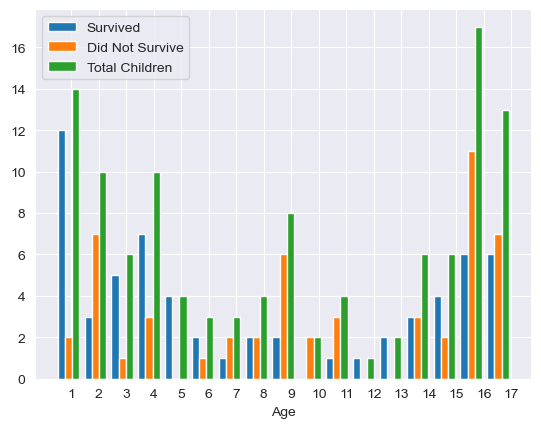

In [18]:
#create list of data for survival by age to plot
x1 = list(data[data['Survived'] == 1]['Age'])
x2 = list(data[data['Survived'] == 0]["Age"])
#plot survival rate by age
plt.hist([x1,x2,data['Age']],label=['Survived','Did Not Survive', 'Total Children'],bins=17)
plt.xlabel("Age")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.legend()

Ages 5,12, and 13 had 100% survival rate. 1-year-olds and 3-year-olds have the 2nd best survival rate. Age 10 had no survivors. Ages 2,16,9, and 17 had the worst survival rates

Survival Rate by Sex
--

In [19]:
#value counts for Sex
data["Sex"].value_counts()

male      58
female    55
Name: Sex, dtype: int64

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (113).

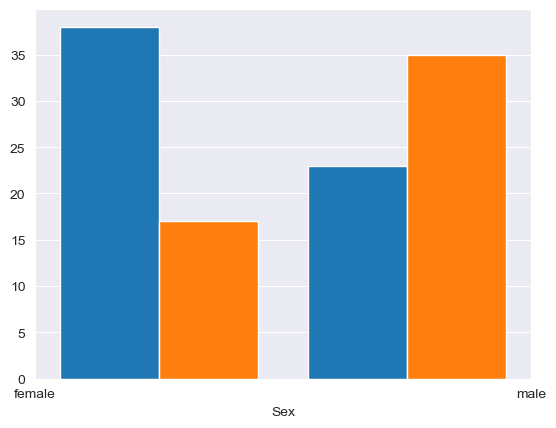

In [20]:
#create list of data for survival by sex to plot
x1 = list(data[data['Survived'] == 1]['Sex'])
x2 = list(data[data['Survived'] == 0]["Sex"])

#plot survival rate by age
plt.hist([x1,x2],label=['Survived','Did Not Survive'],bins=2)
plt.xlabel("Sex")
plt.xticks(ticks = [0,1], labels = data.Sex)
plt.legend()

There were slightly more males on board than females but males had a worse survival rate than females. The male survival rate was about 10 more than the female death rate.

Survival by Class
--

In [ ]:
#plot on class
print(data.Pclass.value_counts())
data.Pclass.value_counts().plot.bar(title = 'Class')
plt.xticks(rotation = 0)

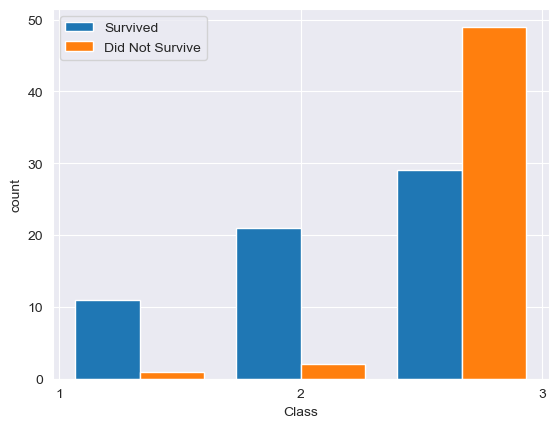

In [44]:
#create list of data for survival by class to plot
x1 = list(data[data['Survived'] == 1]['Pclass'])
x2 = list(data[data['Survived'] == 0]["Pclass"])
plt.hist([x1,x2],label=['Survived','Did Not Survive'],bins=3)
plt.xlabel("Class")
plt.ylabel("count")
plt.xticks([1,2,3])
plt.legend()

In [ ]:
result = data[data['Pclass'] == 3]
num_class3 = len(result)
result2 = data[(data['Survived'] == 1) & (data['Pclass'] == 3)]
surv_class3 = len(result2)
print('({:.0f}%)'.format((surv_class3/num_class3)*100), 'children survived in class 3')

result = data[data['Pclass'] == 2]
num_class2 = len(result)
result2 = data[(data['Survived'] == 1) & (data['Pclass'] == 2)]
surv_class2 = len(result2)
print('({:.0f}%)'.format((surv_class2/num_class2)*100), 'children survived in class 2')

result = data[data['Pclass'] == 1]
num_class1 = len(result)
result2 = data[(data['Survived'] == 1) & (data['Pclass'] == 1)]
surv_class1 = len(result2)
print('({:.0f}%)'.format((surv_class1/num_class1)*100), 'children survived in class 1')

There were significantly more children in class 3. Class 3 has the lowest percent of survival rate even though it had the highest amount of kids.

Survival Rate by Family Members on Board
--
a) Total Family Members
b) Siblings & Spouses
c) Parents & Children

In [25]:
#FAMILY MEMBERS
#Checking the spread of the data
data['Total Family'].value_counts()

2    28
0    23
1    18
5    13
3    12
6     9
4     5
7     5
Name: Total Family, dtype: int64

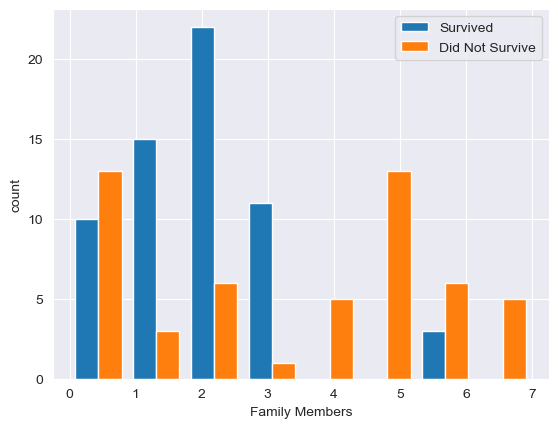

In [26]:
#create list of data for survival by number of family numbers to plot
x1 = list(data[data['Survived'] == 1]['Total Family'])
x2 = list(data[data['Survived'] == 0]["Total Family"])
plt.hist([x1,x2],label=['Survived','Did Not Survive'],bins=8)
plt.xlabel("Family Members")
plt.ylabel("count")
plt.xticks([0,1,2,3,4,5,6,7])
plt.legend()

The higher the number of family members on board, the worse chance of survival. No family members also had a low survival chance. 2 family members had the best survival rate followed by 1 family member.

In [21]:
#value count for SibSp feature
print("SibSp")
data['SibSp'].value_counts()

SibSp


0    43
1    33
4    18
3     7
2     7
5     5
Name: SibSp, dtype: int64

In [22]:
#value count for Parch feature
print('\nParch')
data['Parch'].value_counts()


Parch


1    44
2    36
0    32
3     1
Name: Parch, dtype: int64

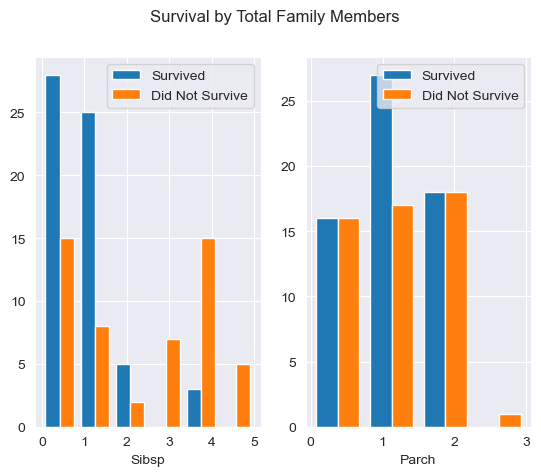

In [23]:
# B/C - SIDE BY SIDE BAR CHARTS FOR SIBSP & PARCH

#figure for side by side plots
fig, [ax1,ax2] = plt.subplots(1,2)
fig.suptitle("Survival by Total Family Members")

#SURVIVAL BY SIBSP
#create list of data for survival by Sibsp to plot
x1 = list(data[data['Survived'] == 1]['SibSp'])
x2 = list(data[data['Survived'] == 0]["SibSp"])
#plot SibSp
ax1.hist([x1,x2],label=['Survived','Did Not Survive'], bins = 6)
ax1.set_xlabel('Sibsp')
ax1.set_xticks((0,1,2,3,4,5))
ax1.legend()


#SURVIVAL BY PARCH
x1 = list(data[data['Survived'] == 1]['Parch'])
x2 = list(data[data['Survived'] == 0]["Parch"])
#plot Parch
ax2.hist([x1,x2],label=['Survived','Did Not Survive'],bins=4)
ax2.set_xlabel('Parch')
ax2.set_xticks([0,1,2,3])
ax2.legend()

In [40]:
print('Number of children that survived based on number of parents on board')
parent1_surv = len(data[(data['Survived']== 1) & (data['Parch']== 1)])
print('ratio of children with 1 parent that survived: ', parent1_surv, ' or', '{:.0f}%'.format((parent1_surv/num_survived)*100))
parent2_surv = len(data[(data['Survived']== 1) & (data['Parch']== 2)])
print('ratio of children with 2 parents that survived: ', parent2_surv, ' or', '{:.0f}%'.format((parent2_surv/num_survived)*100))
parent0_surv = len(data[(data['Survived']== 1) & (data['Parch']== 0)])
print('ratio of children with no parents that survived: ', parent0_surv, ' or', '{:.0f}%'.format((parent0_surv/num_survived)*100))

print('\nNumber of childrent that survived based on number of siblings on board')
sib0_surv = len(data[(data['Survived']== 1) & (data['SibSp']== 0)])
print('ratio of children with no siblings that survived: ', sib0_surv, ' or', '{:.0f}%'.format((sib0_surv/num_survived)*100))
sib1_surv = len(data[(data['Survived']== 1) & (data['SibSp']== 1)])
print('ratio of children with 1 sibling that survived: ', sib1_surv, ' or', '{:.0f}%'.format((sib1_surv/num_survived)*100))
sib3_surv = len(data[(data['Survived']== 1) & (data['SibSp']== 3)])
print('ratio of children with 3 siblings that survived: ', sib3_surv, ' or', '{:.0f}%'.format((sib3_surv/num_survived)*100))
sib4_surv = len(data[(data['Survived']== 1) & (data['SibSp']== 4)])
print('ratio of children with 4 siblings that survived: ', sib4_surv, ' or', '{:.0f}%'.format((sib4_surv/num_survived)*100))

print('\nNumber of children tht survived based on number of parents & siblings on board')
nosib_noparent = len(data[(data['Survived']== 1) & (data['SibSp']== 0)& (data['Parch']== 0)])
print('ratio of children with no parent and no siblings: ', nosib_noparent)
nosib_1parent = len(data[(data['Survived']== 1) & (data['SibSp']== 0)& (data['Parch']== 1)])
print('ratio of children with 1 parent and no siblings: ', nosib_1parent)
nosib_2parent = len(data[(data['Survived']== 1) & (data['SibSp']== 0)& (data['Parch']== 2)])
print('ratio of children with 2 parents and no siblings: ', nosib_2parent)
sib1_1parent = len(data[(data['Survived']== 1) & (data['SibSp']== 1)& (data['Parch']== 1)])
print('ratio of children with 1 parent and 1 siblings: ',sib1_1parent )
sib2_2parent = len(data[(data['Survived']== 1) & (data['SibSp']== 2)& (data['Parch']== 2)])
print('ratio of children with 2 parent and 2 siblings: ',sib2_2parent )

nosib_par = len(data[(data['Survived']== 1) & (data['Total Family'] > 0)])
print("Number of children that survived with at least one family member on board: ", nosib_par)
nosib_par = len(data[(data['Survived']== 0) & (data['Total Family'] > 0)])
print("Number of children that did not survive with at least one family member on board: ", nosib_par)

Number of children that survived based on number of parents on board
ratio of children with 1 parent that survived:  27  or 44%
ratio of children with 2 parents that survived:  18  or 30%
ratio of children with no parents that survived:  16  or 26%

Number of childrent that survived based on number of siblings on board
ratio of children with no siblings that survived:  28  or 46%
ratio of children with 1 sibling that survived:  25  or 41%
ratio of children with 3 siblings that survived:  0  or 0%
ratio of children with 4 siblings that survived:  3  or 5%

Number of children tht survived based on number of parents & siblings on board
ratio of children with no parent and no siblings:  10
ratio of children with 1 parent and no siblings:  9
ratio of children with 2 parents and no siblings:  9
ratio of children with 1 parent and 1 siblings:  13
ratio of children with 2 parent and 2 siblings:  0
Number of children that survived with at least one family member on board:  51
Number of children

No siblings/spouses had the highest survival rate followed by 1 parent/child. Having more than one sibling on board decreased chance of survival with 3 and 5 having no chance of survival.No parents/children had equal chances of surviving or not.
Solution - Children traveling with 1-3 family members has the highest number of survivors.

Survival by Embarkation Port
--

In [41]:
#value counts
data.Embarked.value_counts()

S    82
C    24
Q     7
Name: Embarked, dtype: int64

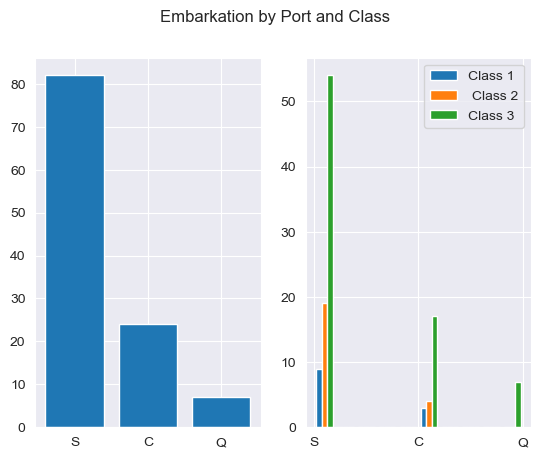

In [42]:
#figure for port & class
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Embarkation by Port and Class')

#plotting values of amount of embarkations at each part
#ax1 = data.Embarked.value_counts().plot(kind = 'bar', title = "Port of Embarkation")
#plt.xticks(rotation = 0)

ax1.bar(data['Embarked'].unique(), height =data['Embarked'].value_counts())

#plotting amount of each class embarkations at each port
#create list of data to plot
x1 = list(data[data['Pclass'] == 1]['Embarked'])
x2 = list(data[data['Pclass'] == 2]['Embarked'])
x3 = list(data[data['Pclass'] == 3]['Embarked'])

ax2.hist([x1,x2,x3], label= ('Class 1',' Class 2','Class 3'))
#ax2.xticks(['C','Q','S'])
ax2.legend()

most children embarked at S (Southampton). Southampton also had the highest number of class 3 embarkations.

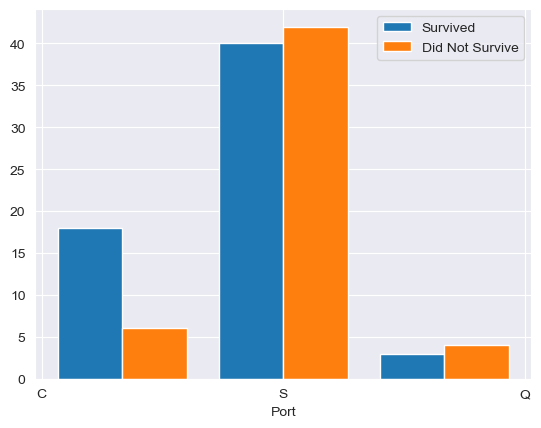

In [43]:
#create list of data for survival by port to plot
x1 = list(data[data['Survived'] == 1]['Embarked'])
x2 = list(data[data['Survived'] == 0]["Embarked"])

#plotting
plt.hist([x1,x2],label=['Survived','Did Not Survive'],bins=3)
plt.xlabel("Port")
plt.xticks(['C','Q','S'])
plt.legend()

Southamptom embarkation has almost equal odds of survival - did not survive was slightly more likely.

solution - Since 1st/2nd class had highest survival, requiring children traveling alone to be in either of those classes would increase survival odds.
next steps - req children to travel with at least on family member, look at survival rate based on age and number of family members travelled with.